In [2]:
import pandas as pd
import numpy as np
import os
import glob
import chardet
import joblib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
curr_path = 'C:/Users/cheng/Desktop/DSA3101/DSA3101_project/All Linear model/2000 model/'
data_2000 = pd.read_csv("2000.csv", encoding="mac_roman")

In [4]:
## Function to group time
def bin_time(crs_time):
    if crs_time == 2400:
        return 3
    return crs_time // 600


## Functin to get season based on month 
def get_season(month):
    season_dict = {(1,2,3): 'spring', (4,5,6): 'summer', (7,8,9): 'autumn', (10,11,12): 'winter'}
    for key, val in season_dict.items():
        if month in key:
            return val

In [5]:
## Data preprocessing 
data_2000['SEASON'] = data_2000['MONTH'].apply(get_season)
data_2000['CRS_ARR_BIN'] = data_2000['CRS_ARR_TIME'].apply(bin_time)   
## Definition of delay is more than 60 mins
data_2000['HAS_ARR_DELAY'] = data_2000['ARR_DELAY_GROUP'].apply(lambda x: 1 if x > 3 else 0)

In [6]:
## Select columns 
variables = ['DAY_OF_WEEK', 'SEASON', 'DISTANCE', 'CRS_ARR_BIN', 'PRCP_ORIGIN', 'SNOW_ORIGIN', 
                        'SNWD_ORIGIN', 'TMAX_ORIGIN', 'TMIN_ORIGIN', 'HAS_ARR_DELAY', 'ARR_DELAY']
data_2000 = data_2000[variables]
data_2000 = data_2000.dropna()

In [7]:
## Train test split for linear regression 
variables_lm = ['ARR_DELAY', 'DAY_OF_WEEK', 'SEASON', 'DISTANCE', 'CRS_ARR_BIN', 
               'PRCP_ORIGIN', 'SNOW_ORIGIN', 'SNWD_ORIGIN', 'TMAX_ORIGIN', 'TMIN_ORIGIN']
lm_data = data_2000[variables_lm]
lm_data = pd.get_dummies(lm_data, columns = ['DAY_OF_WEEK', 'CRS_ARR_BIN', 'SEASON'])
lm_data = preprocessing.normalize(lm_data)
lm_data = pd.DataFrame(lm_data)
X_data_lm = lm_data.iloc[:, 1:]
y_data_lm = lm_data.iloc[: , 0]

In [8]:
## Linear Regression model
lm = LinearRegression()
lm.fit(X_data_lm, y_data_lm)

LinearRegression()

In [9]:
x = ['DISTANCE', 'PRCP_ORIGIN', 'SNOW_ORIGIN', 'SNWD_ORIGIN',
       'TMAX_ORIGIN', 'TMIN_ORIGIN', 'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'CRS_ARR_BIN_0', 'CRS_ARR_BIN_1', 'CRS_ARR_BIN_2',
       'CRS_ARR_BIN_3', 'SEASON_autumn', 'SEASON_spring', 'SEASON_summer',
       'SEASON_winter']

Text(0.5, 0, 'linear regression regressor coefficient for arrival delay')

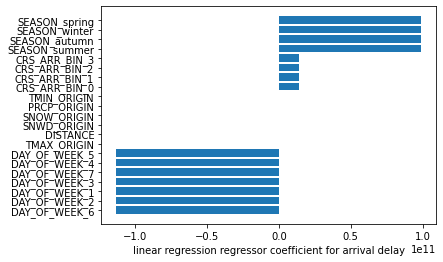

In [10]:
# Plot regressor varaible weights
final = []
for i in range(len(x)):
    final.append([lm.coef_[i], x[i]])
final.sort()
X = []
Y = []
for i in final:
    X.append(i[1])
    Y.append(i[0])
plt.barh(X, Y)
plt.xlabel("linear regression regressor coefficient for arrival delay")

In [11]:
## Train test split or DT
X_variables_dt = ['DAY_OF_WEEK', 'SEASON', 'DISTANCE', 'CRS_ARR_BIN', 
               'PRCP_ORIGIN', 'SNOW_ORIGIN', 'SNWD_ORIGIN', 'TMAX_ORIGIN', 'TMIN_ORIGIN']
X_data_dt = data_2000[X_variables_dt]
X_data_dt = pd.get_dummies(X_data_dt, columns = ['DAY_OF_WEEK', 'CRS_ARR_BIN', 'SEASON'])
y_data_dt = data_2000['HAS_ARR_DELAY']

In [12]:
## Decision Tree model 
dt = DecisionTreeClassifier()
dt.fit(X_data_dt, y_data_dt)

DecisionTreeClassifier()

Text(0.5, 0, 'Decision Tree Coefficient for arrival delay')

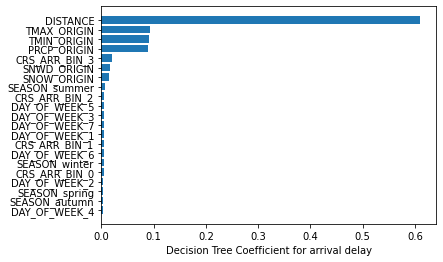

In [13]:
## Plot Dt coefficient
final = []
for i in range(len(dt.feature_names_in_)):
    final.append([dt.feature_importances_[i], dt.feature_names_in_[i]])
final.sort()
X = []
Y = []
for i in final:
    X.append(i[1])
    Y.append(i[0])
plt.barh(X, Y)
plt.xlabel("Decision Tree Coefficient for arrival delay")